# Mutual information and K-means LAB.7 Solutions

In this lab we implement the mutual information criterion and k-means.

In [8]:
import numpy as np # linear algebra
import pandas as pd  # csv manipulation
import matplotlib.pyplot as plt # for plotting
from sklearn.preprocessing import OrdinalEncoder # for preprocessing
from scipy.spatial.distance import cdist # for distances calculation

## Exercise 1

Let's first download the dataset and preprocess it.

In [9]:
# downloading and convert to string values
df = pd.read_csv("../Datasets/breast_cancer.csv", header=None)
df = df.astype(str)

# apply ordinal encoder
encoder = OrdinalEncoder()
encoder.fit(np.array(df))
data = encoder.transform(df)

# extract data and labels
X = data[:,0:9]
y = data[:,9]

Let's write the mutual information criterion

In [10]:
def mic(X, y):

    # number of features
    n_elements, numb_covariates = X.shape

    # mic array
    mic = np.empty(shape=(numb_covariates,))


    # for each feature
    for cov_idx in range(numb_covariates):

        # extract features + vector value covariate
        covariate = X[:, cov_idx]
        features = np.unique(covariate)

        # storing the total sum
        sum_ = 0

        # calculate mic
        for y_val in np.unique(y):
            for feat in features:
                mask = np.logical_and( (covariate == feat) ,  (y == y_val) )
                prob_x_y = np.sum(mask) / n_elements
                prob_x = np.sum(covariate == feat) / n_elements
                prob_y = np.sum(y == y_val) / n_elements 

                if prob_x_y == 0: # we assume 0 * log(0) = 0
                    continue
                
                #print(f"{cov_idx=}, {prob_x_y=}, {prob_x=}, {prob_y[idx_yval]=}")
                sum_ += (prob_x_y * np.log( prob_x_y / (prob_x * prob_y) ))

        # storing mic   
        mic[cov_idx] = sum_

    return mic

We can plot the result using a bar plot

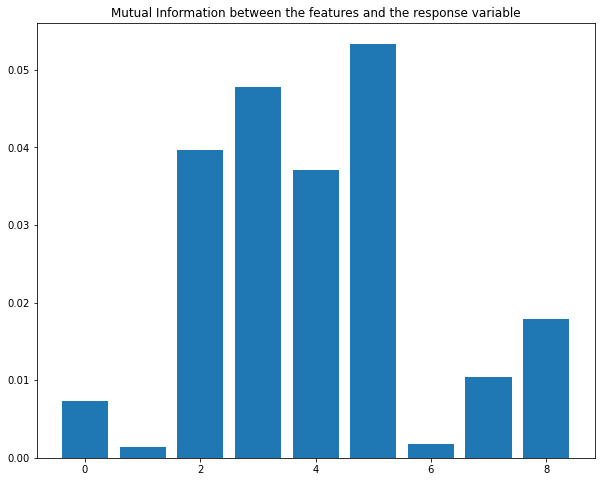

In [11]:
plt.figure(figsize=(10,8))
MI = mic(X, y)
plt.bar([i for i in range(len(MI))], MI)
plt.title("Mutual Information between the features and the response variable")
plt.show()

The result highlight that the covariate five is the most significant, due to the hhigher MI score. The same results can be obtained using the built in function  `mutual_info_classif` from sklearn

In [12]:
from sklearn.feature_selection import mutual_info_classif

# mic with sklean
sklearn_mic = mutual_info_classif(X, y, discrete_features=True)

# my mic
mymic = mic(X, y)

# check
np.allclose(mymic, sklearn_mic)

True

## Exercise 2

Let's now implement the k-means class.

In [13]:
class KMeans(object):

    def __init__(self, n_clusters, init='random', max_iter=300):

        initializations = ['random']
        if init not in initializations:
            raise ValueError(f'possible initializations include {initializations}')

        self.init = init

        if isinstance(n_clusters, int):
            self.n_clusters = n_clusters
        else:
            raise ValueError('expected int for n_clusters')

        self.max_iter = max_iter


    def fit(self, X):
        
        # save data
        self._X_fit = X

        # extract number of features and dimensions
        n_feats, dims = X.shape

        # intialize kmeans
        centers = self._initialize(X)

        # epochs + old_labels
        epoch = 0
        old_labels = np.zeros(n_feats, )

        while True:

            # find the distances
            dists = cdist(X, centers)

            # find the labels
            labels = np.argmin(dists, axis=-1)

            # update centroids
            centers = np.array([np.mean(X[labels==k], axis=0) for k in set(labels)])

            # breaking if no change in the labels:
            if np.allclose(labels, old_labels):
                break

            # breaking at maximum iteration
            if epoch == self.max_iter:
                break
            
            # update
            old_labels = labels
            epoch += 1


        # saving variables
        self.centers = centers
        self.labels = labels
        self.set_labels = set(labels)
        self.loss = np.sum(dists.min(axis=-1))
        self.final_epoch = epoch

    def _initialize(self, X):
        """ Initialization routine """
        if self.init == 'random':
            idxs = np.random.choice(len(X), size=self.n_clusters, replace=False)
            return X[idxs]
        else:
            TypeError

    def plot_kmeans(self):

        plt.figure(figsize=(10,8))
        plt.scatter(self._X_fit[:,0], self._X_fit[:,1], c=self.labels)
        plt.plot(self.centers[:,0], self.centers[:,1], 'ro')
        plt.title(f"Final loss {self.loss:.2f}")
        plt.show()


Let's import the data and perform k-means

In [14]:
# import data
data = np.genfromtxt("../Datasets/s3.txt")

# construct k-means and fit with 10 different initializations
results = []

for i in range(10):
    kmeans = KMeans(15)
    kmeans.fit(data)
    results.append((kmeans.loss, kmeans))

The results are composed by the loss and the k-means pointer 

In [15]:
results

[(257706327.71001583, <__main__.KMeans at 0x10616ae20>),
 (295096429.7257663, <__main__.KMeans at 0x16a2a1fa0>),
 (292166918.98893225, <__main__.KMeans at 0x168e91fd0>),
 (279432170.51429236, <__main__.KMeans at 0x16a2a1550>),
 (279025855.05882263, <__main__.KMeans at 0x16a2d27f0>),
 (259369189.6448273, <__main__.KMeans at 0x16a2d2130>),
 (241052491.28148285, <__main__.KMeans at 0x16a2d2340>),
 (259041679.76168403, <__main__.KMeans at 0x16a2d2730>),
 (256853033.34584454, <__main__.KMeans at 0x16a2d2760>),
 (260365132.6598731, <__main__.KMeans at 0x16a2d2bb0>)]

Let's use the one with minimum loss and plot the results.

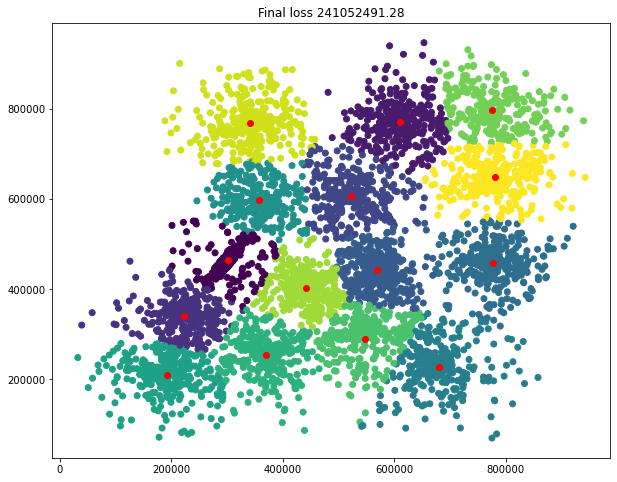

In [16]:
sorted_results = sorted(results, key = lambda x : x[0])
sorted_results[0][1].plot_kmeans()

Also the one with maximum loss

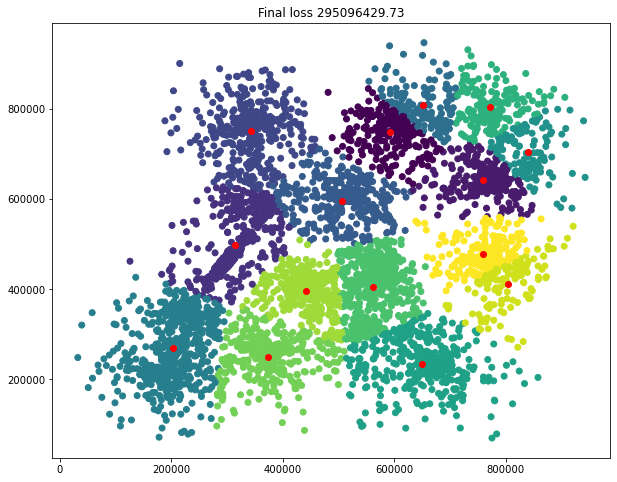

In [17]:
sorted_results[-1][1].plot_kmeans()